In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# 1. Lire une image A en couleur de format .PNG
image_path = 'Grindizer.png'
A = cv2.imread(image_path, cv2.IMREAD_COLOR)

# 2. Afficher l'image
cv2.imshow('Image Originale', A)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
# 3. Afficher les dimensions
dimensions = A.shape
print(f"Dimensions de l'image: {dimensions}")

Dimensions de l'image: (400, 400, 3)


In [24]:
# 4. Sauvegarde en .JPG et .TIFF
cv2.imwrite('image.jpg', A)
cv2.imwrite('image.tiff', A)

True

In [25]:
# 5. Afficher les dimensions des images enregistrées
A_jpg = cv2.imread('image.jpg')
A_tiff = cv2.imread('image.tiff')
print(f"Dimensions JPG: {A_jpg.shape}")
print(f"Dimensions TIFF: {A_tiff.shape}")

Dimensions JPG: (400, 400, 3)
Dimensions TIFF: (400, 400, 3)


In [10]:
# 6. Comparer les 3 formats (affichage des tailles)
import os
print(f"Taille PNG: {os.path.getsize(image_path)/1024} kilo octets")
print(f"Taille JPG: {os.path.getsize('image.jpg')/1024} kilo octets")
print(f"Taille TIFF: {os.path.getsize('image.tiff')/1024} kilo octets")

Taille PNG: 74.49609375 kilo octets
Taille JPG: 37.72265625 kilo octets
Taille TIFF: 73.6171875 kilo octets


-L'image sous format .JPG est la plus petite en terme de taille (37.7 KO) et aussi la plus compressée (perte de qualité). Le format ne support pas la transparence (pas de niveau alpha).
-L'image sous format .PNG est la plus grande en terme de taille (74.4 KO) et elle est de bonne qualité. Le format support la transparence (niveau alpha existe).
-L'image sous format .TIFF est de taille 73.6 KO, plus proche au .PNG que .JPG. Le format ne support pas la transparence.

In [4]:
# 7. Affichage des niveaux de rouge, vert et bleu
B, G, R = cv2.split(A)
B1 = cv2.merge((B, np.zeros_like(B), np.zeros_like(B)))
G1 = cv2.merge((np.zeros_like(G), G, np.zeros_like(G)))
R1 = cv2.merge((np.zeros_like(R), np.zeros_like(R), R))
cv2.imshow('Niveau de Rouge', R1)
cv2.imshow('Niveau de Vert', G1)
cv2.imshow('Niveau de Bleu', B1)
retrouve_A = cv2.merge((B, G, R))
cv2.imshow('Image retrouvée', retrouve_A)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
# 8. Conversion en niveaux de gris
gray = cv2.cvtColor(A, cv2.COLOR_BGR2GRAY)
cv2.imshow('Niveaux de gris', gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
# 9. Conversion en binaire
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
cv2.imshow('Image Binaire', binary)
cv2.waitKey(0)
cv2.destroyAllWindows()

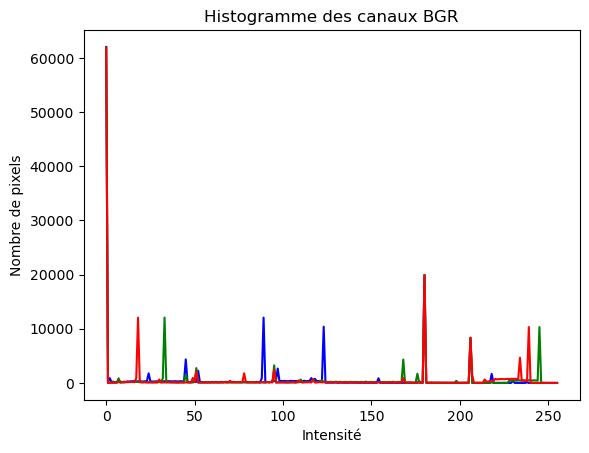

In [19]:
# 10. Tracer l'histogramme
colors = ('b', 'g', 'r')
for i, col in enumerate(colors):
    hist = cv2.calcHist([A], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
plt.title('Histogramme des canaux BGR')
plt.xlabel('Intensité')
plt.ylabel('Nombre de pixels')
plt.show()

In [35]:
# 11. Trouver l'image inverse
B, G, R = cv2.split(A)
retrouve_A = cv2.merge((255 - B, 255 - G, 255 - R))
cv2.imshow('Image Inverse', retrouve_A)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [32]:
# 12. Conversion en HSV et affichage des composantes
HSV = cv2.cvtColor(A, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(HSV)
cv2.imshow('Composante H', H)
cv2.imshow('Composante S', S)
cv2.imshow('Composante V', V)
cv2.waitKey(0)
cv2.destroyAllWindows()